<center>
    <h3> CHƯƠNG 2: CÁC BƯỚC XÂY DỰNG MỘT MÔ HÌNH HỌC MÁY</h3>
    <h4 style='color:red'> Phần 2: Chuẩn bị dữ liệu cho học máy</h4>
 </center>
 
---

**Các bước để xây dựng một mô hình học máy nói chung:**

<img src='pic/preparation.png' width='500px'>

---
Copyright @dangvannam - FIT.HUMG - BKACAD.2023


**XỬ LÝ TẬP DỮ LIỆU TITANIC:**

- Tập dữ liệu Data_Titanic.csv:
- File dữ liệu chứa 1309 bản ghi tương ứng với 1309 hành khách (với đầy đủ các thông tin liên quan)

<img src='Pic/titanic.jpg'>

Mỗi hành khách (mẫu) bao gồm các thuộc tính:
1.  PassengerId: ID của hành khách
2.  Survival: Thuộc tính cho biết hành khách được cứu hay không (ground truth) 0 = No (Không được cứu); 1 = Yes (Được cứu)
3.   Pclass: Loại vé tàu (Cho biết Địa vị xã hội): 1 - Hạng nhất; 2 - Hạng hai; 3 - Hạng 3
4.   Name: Tên của hành khách
5.  Sex: Giới tính (Male/Female)
6. Age: Tuổi (Tính theo năm)
7. SibSp: Số lượng anh chị em/bạn đời trên khoang tàu 
8. Parch: Số lượng cha mẹ/con cái trên khoang tàu
9. Ticket: Số hiệu vé
10. Fare: Phí hành khách
11. Cabin: Số hiệu cabin
12. Embarked: Cổng lên tàu (C = Cherourg; Q = Queenstown, S=Southampton)

## THỰC HIỆN CHUẨN BỊ DỮ LIỆU CHO HỌC MÁY
---
### 1) Tải tập dữ liệu:

In [1]:
#Gọi các thư viện sử dụng cho Project:
# Data analysis and wrangling:
import pandas as pd
import numpy as np

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Đọc dữ liệu trong file .csv
df_titanic = pd.read_csv('Data/Data_Titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [3]:
#Hiển thị danh sách thông tin hành khách đầu tiên
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Hiển thị dữ liệu hành khách cuối cùng
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
#Quan sát 5 hành khách ngẫu nhiên:
df_titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
1219,1220,0,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,26.0000,NaN,S
988,989,0,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


### 2) Phân tích - Thống kê số liệu 
---
Khám phá số liệu để hiểu về các thuộc tính

In [6]:
#Phân tích số liệu tập Train
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df_titanic[df_titanic['Fare']>=500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [8]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
df_titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [9]:
df_titanic[df_titanic['Name']=='Connolly, Miss. Kate']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [10]:
#Xây dựng hàm thống kê dữ liệu missing trong dataframe:
#-----------------------------------------------------
#Đầu vào của hàm là 1 biến Dataframe
#Đầu ra bao gồm các thông số:
#Tổng số cột của file dữ liệu
#Tổng số cột có chứa dữ liệu missing
#Danh sách các cột chứa dữ liệu missing với 2 thống số:
#Tổng số giá trị missing tương ứng với cột đó
#Tỷ lệ % dữ liệu missing trên tổng số dữ liệu của cột
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [11]:
print('Số lượng missing data trong tập Train: \n')
missing_values(df_titanic)

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 12 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Cabin,1014,77.46
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08


<Axes: >

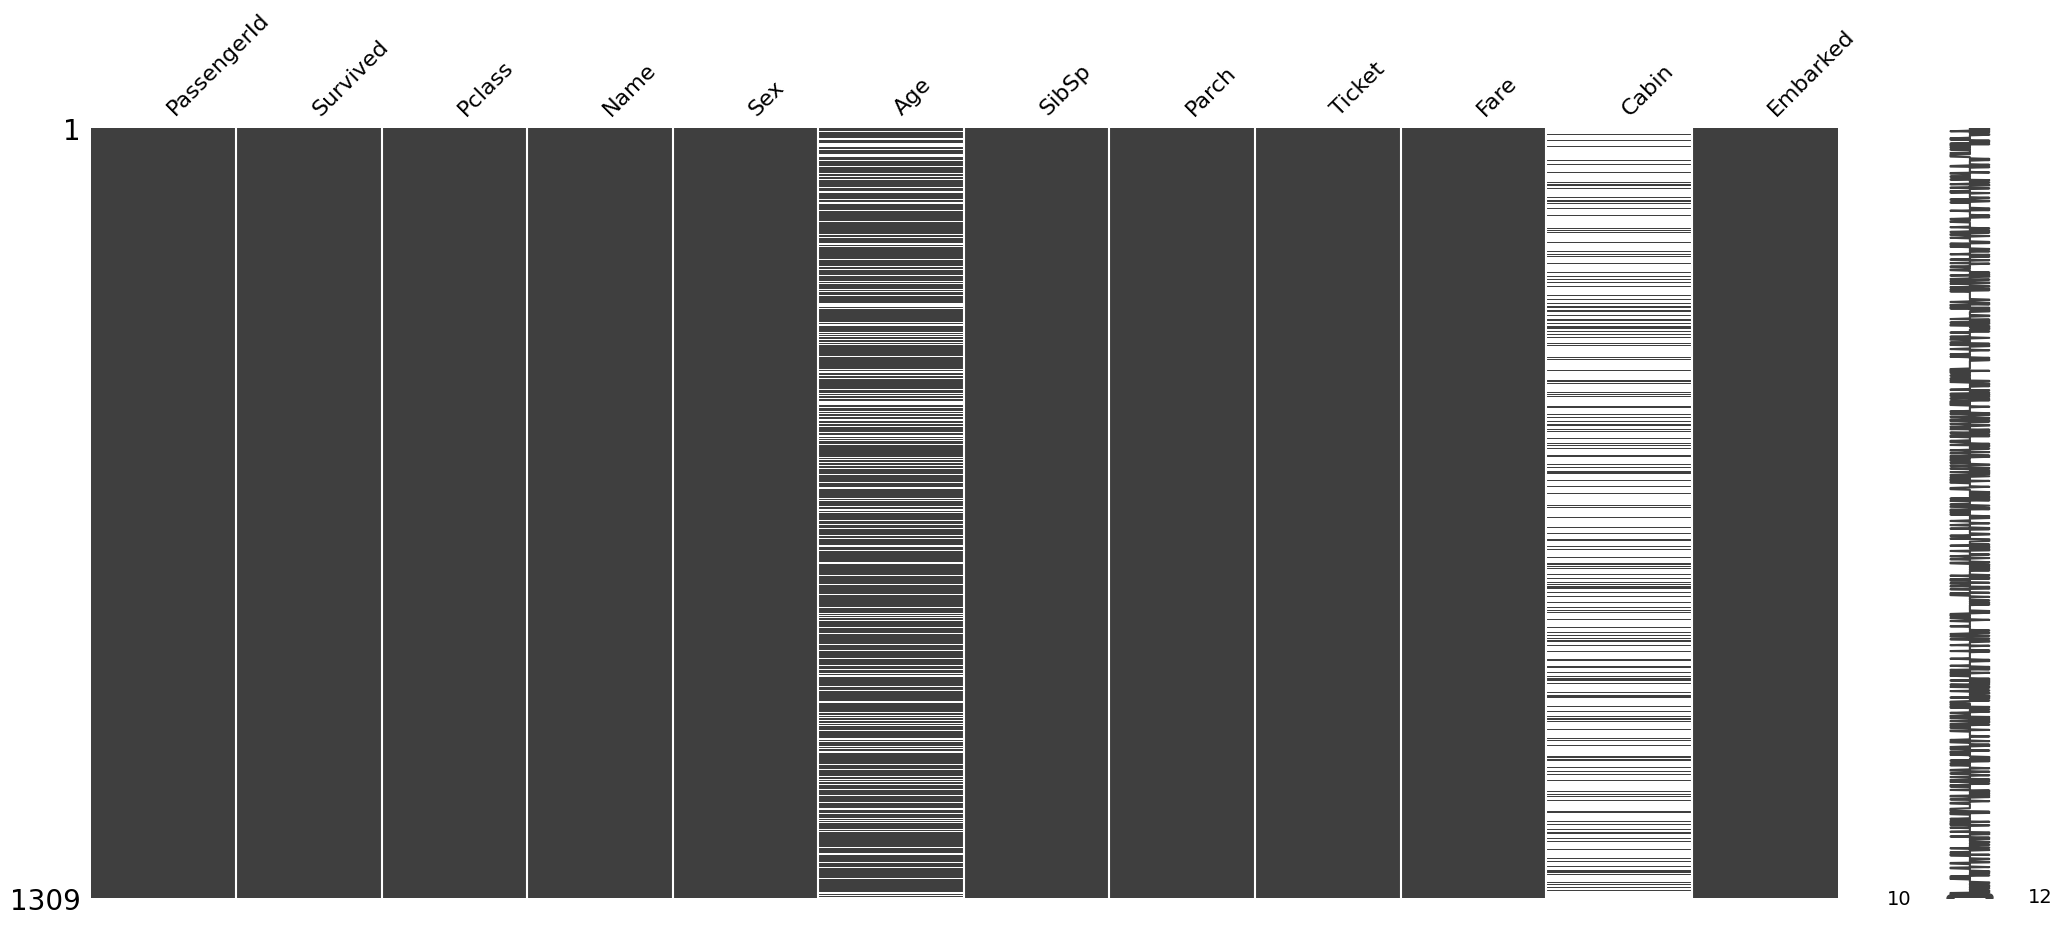

In [12]:
#Trực quan hóa missing:
import missingno as mn
mn.matrix(df_titanic)

### Phân tích các thuộc tính quan trọng ảnh hưởng đến khả năng sống/chết (survived) của hành khách:
---
Mỗi một hành khách bao gồm 12 thuộc tính (tương ứng với 12 cột dữ liệu)

#### a) Thuộc tính Hạng vé tàu - Pclass:
---
Pclass: Loại vé tàu của hành (cho biết địa vị xã hội) 1 – Hạng nhất | 2 – Hạng 2 | 3 – Hạng ba

In [13]:
#Đặc tính Hạng vé tàu - Pclass:
df_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


**Pclass: ảnh hưởng tới khả năng được cứu của hành khách. Hành khách có vé hạng nhất khả năng được cứu cao hơn hạng 2,3**

### b) Thuộc tính Giới tính - Sex:
---

In [14]:
#Đặc tính Giới tính - Sex:
df_titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.82618
1,male,0.12930


**Sex: Ảnh hưởng cao tới khả năng được cứu của hành khách. Hành khách là Nữ (female) có tỷ lệ được cứu sống là ~74% trong khi hành khách Nam chỉ có tỷ lệ cứu sống là ~19%**

#### c) Thuộc tính tuổi - Age:
---

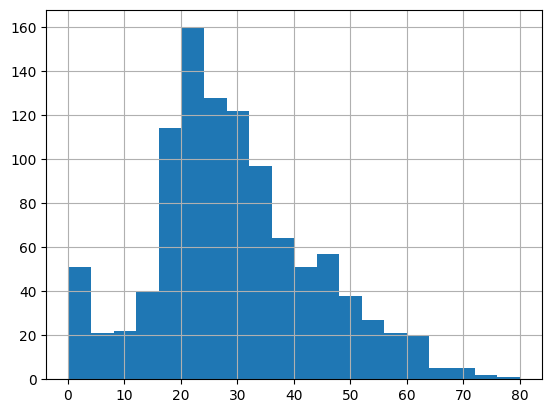

In [15]:
plt.hist(df_titanic.Age,bins=20)
plt.grid(True)
plt.show()

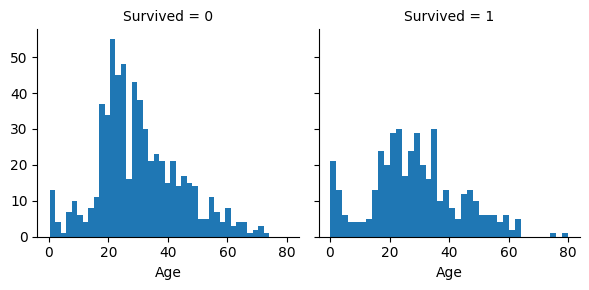

In [16]:
#Thống kê liệu tuổi hành khách còn sống|chết theo tuổi
g = sns.FacetGrid(df_titanic, col='Survived')
g.map(plt.hist, 'Age', bins=40)
plt.show()

Quan sát dữ liệu Tuổi:
*  Hầu hết hành khách đi tàu nằm trong độ tuổi từ 15 - 35
*  Trẻ em (Tuổi <=4) có tỷ lệ được cứu cao
*  Các hành khách già nhất (Tuổi = 80) đều được cứu
*  Một lượng lớn hành khách trong độ tuổi từ 15 - 25 không được cứu

**NHẬN XÉT:**

*  Thuộc tính Age ảnh hưởng tới khả năng được cứu của hành khách --> đưa vào mô hình huấn luyện
*  Xử lý một số dữ liệu missing của thuộc tính age
*  Nhóm các độ tuôi theo từng group

#### d) Thuộc tính SibSp:
---
SibSp (Siblings/Spouses): Số lượng anh chị em| vợ chồng của hành khách cùng trên tàu(Kiểu dữ liệu: số)

In [17]:
df_titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.520376
2,2,0.452381
0,0,0.334456
3,3,0.250000
4,4,0.181818
5,5,0.166667
6,8,0.111111


**NHẬN XÉT:** SibSp có ảnh hưởng tới khả năng được cứu của hành khách. Những người có 1,2 người thân đi cùng hoặc đi một mình có tỷ lệ được cứu cao hơn những người khác

#### e) Thuộc tính Parch:
---
Parch(Parents/Children): Số lượng bố mẹ| con cái của hành khách cùng trên tàu(Kiểu dữ liệu: số)


In [18]:
df_titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.625000
1,1,0.547059
2,2,0.530973
7,9,0.500000
4,4,0.333333
0,0,0.331337
5,5,0.166667
6,6,0.000000


**NHẬN XÉT:** Thuộc tính Parch cũng ảnh hưởng tới việc được sống|chết của hành khách, các hành khách có số lượng 1, 2, 3 tỷ lệ sống sót cao hơn

#### f) Thuộc tính Fare:
---
Fare: Giá vé đi tàu của hành khách (Kiểu dữ liệu: Số)

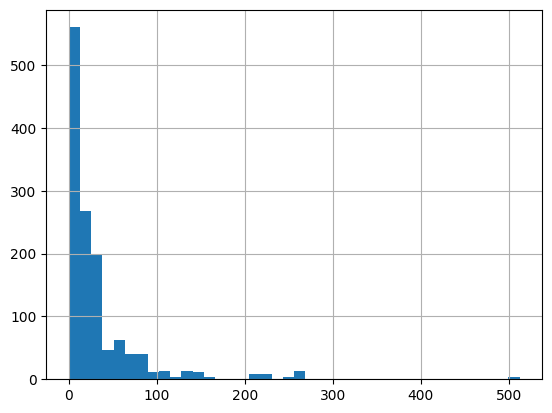

In [19]:
plt.hist(df_titanic.Fare,bins=40)
plt.grid(True)
plt.show()

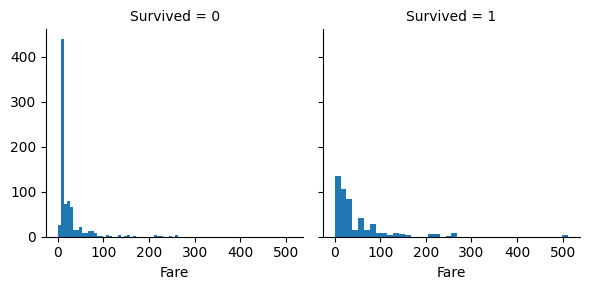

In [20]:
#Thống kê liệu tuổi hành khách còn sống|chết theo tuổi
g = sns.FacetGrid(df_titanic, col='Survived')
g.map(plt.hist, 'Fare', bins=40)
plt.show()

#### g) Thuộc tính Embarked:
---
Ký hiệu cho biết cảng mà hành khách lên tàu, Tàu Titanic đón khách ở 3 cảng: C = Cherbourg | Q = Queenstown | S =Southampton (Kiểu dữ liệu: ký tự)


In [21]:
#Đặc tính Giới tính - Sex:
df_titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.492593
1,Q,0.439024
2,S,0.333698


**NHẬN XÉT:** Thuộc tính Embarked có ảnh hưởng tới khả năng được cứu, những hành khách lên tàu ở cảng S, Q tỷ lệ được cứu cao hơn là lên tàu ở cảng S

In [22]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3) Làm sạch dữ liệu
---

#### 3.1) Loại bỏ các thuộc tính không quan trọng
---
* Một số thuộc tính không|ít ảnh hưởng tới việc hành khách được cứu hay không, cần loại bỏ những thuộc tính này khỏi dữ liệu. Để giảm chiều dữ liệu và nâng cao chất lượng của dữ liệu huấn luyện.

* Có 4 thuộc tính không ảnh hưởng|ít ảnh hưởng bao gồm:

    1. **PassengerId:** Thuộc tính này chỉ mà id, đánh số thứ tự của hành khách (Bỏ)
    2. **Name:** Tên của hành khách --> (Bỏ)
    3. **Ticket:** Số vé của hành khách (Bỏ)
    4. **Fare:** Giá vé - Giá vé đã được phản ánh thông qua thuộc tính Pclass (hạng vé: 1, 2, 3) (Bỏ)
    5. **Cabin:** Số hiệu Cabin trên tàu của hành khách - Thuộc tính này có tỷ lệ dữ liệu thiếu rất lớn, chiếm ~77,5% dữ liệu --> Bỏ

In [23]:
#Tạo một DataFrame mới df_data loại bỏ đi 5 thuộc tính ko quan trọng
df_data = df_titanic.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [24]:
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### 3.2) Xử lý các thuộc tính missing value:
---
* Các mô hình học máy không làm việc được với các bản ghi chứa thuộc tính missing do đó cần phải được xử lý.

* Trong tập dữ liệu hiện tại có thuộc tính chứa giá trị missing, bao gồm:

    1. **Age:** Missing 263 bản ghi (chiếm 20.09%)
    2. **Embarked:** Missing 2 bản ghi (chiếm 0.15%)


In [25]:
missing_values(df_data)

File dữ liệu bao gồm có: 7 cột.
Có 2 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Age,263,20.09
Embarked,2,0.15


##### 3.2.1) Xử lý giá trị mất mát của thuộc tính Embarked
---
Thuộc tính Embarked cho biết hành khách lên tàu ở Port nào? Embarked nhận 1 trong  3 giá trị S, Q, C.

Trong thuộc tính Embarked có 2 giá trị missing, để xử lý các giá trị missing này ta thực hiện bằng cách, lấy giá trị xuất hiện nhiều nhất của thuộc tính Embarked để thay thế cho giá trị missing.

Tổng 1309 hành khách, có 1307 hành khách có giá trị thuộc tính Embarked, 2 hành khách missing.

In [26]:
#Dánh sách hành khách missing thộc tính Embarked trong tập dữ liệu
df_data[df_data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [27]:
#Thống kê số lượng hành khách theo cảng lên tàu:
df_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Trong ba giá trị S, Q, C có số lần xuất hiện như sau:
* 0 (S): 914 lần (Xuất hiện nhiều nhất) chiếm ~70%  
* 1 (C) : 270 lần - chiếm 20.6%
* 2 (Q): 123 lần - chiếm 9.4%

==> Xử lý thuộc tính Embarked bằng giá trị xuất hiện nhiều nhất trong dữ liệu đó là cảng S

In [28]:
df_data['Embarked'] = df_data['Embarked'].fillna('S')

In [29]:
#Thống kê dữ liệu sau khi xử lý missing thuộc tính Embarked
df_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      0
dtype: int64

#####  3.2.2) Xử lý dữ liệu mất mát của thuộc tính Age
---
Tập dữ liệu có 263 hành khách bị missing thông tin về tuổi chiếm tỷ lệ (20.09%)


In [30]:
#Dánh sách hành khách missing thộc tính Embarked trong tập dữ liệu
df_data[df_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
...,...,...,...,...,...,...,...
1299,1,3,female,NaN,0,0,Q
1301,1,3,female,NaN,0,0,Q
1304,0,3,male,NaN,0,0,S
1307,0,3,male,NaN,0,0,S


**Có một sự tương quan giữa thuộc tính Age, Sex và Pclass.**

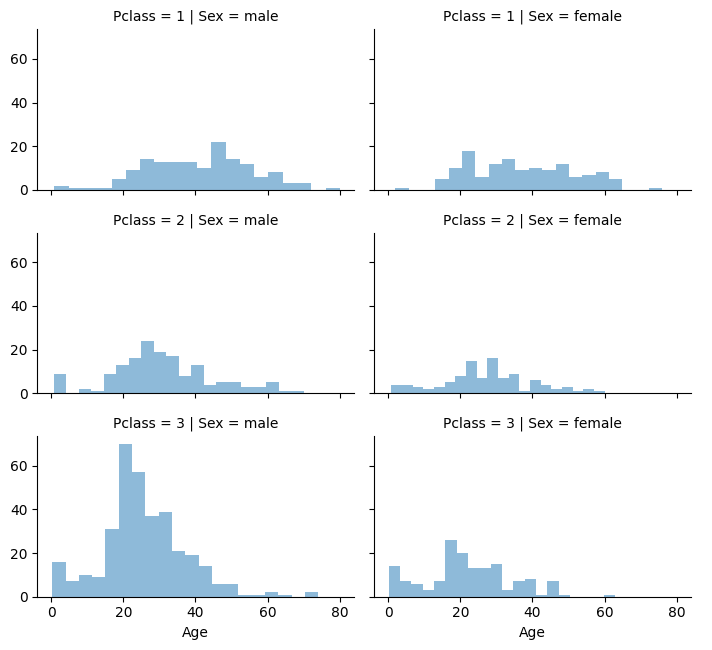

In [31]:
grid = sns.FacetGrid(df_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

**Bởi vậy chúng ta sẽ ước chừng giá trị Age tại các vị trí thiếu sử dụng các giá trị trung bình của thuộc tính Age theo các tập của sự kết hợp giữa thuộc tính Pclass và Sex. như, trung bình Age của Pclass = 1 và Sex = 0, Pclass = 1 và Sex = 1...vv.**

##### Thay thế các giá trị null bằng giá trị trung bình của độ tuổi theo Sex, Pclass
---

 Thay thế các giá trị null trong thuộc tính Age của các hành khách này dựa vào tuổi trung bình tương ứng với các hành khách có cùng chung thuộc tính Sex và Pclass với hành khách có tuổi bị missing đó. Bao gồm 6 nhóm
 
* Nhóm 1:  sex = Male, pclass = 1, (có độ tuổi trung bình 41)
 
* Nhóm 2: sex = Male, pclass = 2, (có độ tuổi trung bình 31)
 
* Nhóm 3: sex = Male, pclass = 3, (có độ tuổi trung bình 26)
 
* Nhóm 4: sex = Female, pclass = 1, (có độ tuổi trung bình 37)
 
* Nhóm 5: sex = Female, pclass = 2, (có độ tuổi trung bình 27)
 
* Nhóm 6: sex = Female, pclass = 3, (có độ tuổi trung bình 22)

In [32]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [33]:
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [34]:
#Xử lý missing nhóm 1:
# Xác định tuổi trung bình của hành khách có thuộc tính sex = male, pclass = 1
#Danh sách các hành khách thỏa mãn:
df_male_1 =  df_data[(df_data['Sex']=='male') & (df_data['Pclass']==1)]
df_male_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
6,0,1,male,54.0,0,0,S
23,1,1,male,28.0,0,0,S
27,0,1,male,19.0,3,2,S
30,0,1,male,40.0,0,0,C
34,0,1,male,28.0,1,0,C
...,...,...,...,...,...,...,...
1269,0,1,male,55.0,0,0,S
1281,0,1,male,23.0,0,0,S
1294,0,1,male,17.0,0,0,S
1295,0,1,male,43.0,1,0,C


In [35]:
Age_mean_male_1 = round(df_male_1['Age'].mean(),0)
print('Tuổi trung bình của nhóm hành khách có giới tính male và Pclass = 1:', Age_mean_male_1)

Tuổi trung bình của nhóm hành khách có giới tính male và Pclass = 1: 41.0


In [36]:
#Thay thế tuổi của các hành khách có giới tính Sex=male và Pclass = 1 bị missing bằng tuổi trung bình của nhóm này
df_data[(df_data['Sex']=='male') & (df_data['Pclass']==1) & (df_data['Age'].isnull())]


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
55,1,1,male,NaN,0,0,S
64,0,1,male,NaN,0,0,C
168,0,1,male,NaN,0,0,S
185,0,1,male,NaN,0,0,S
270,0,1,male,NaN,0,0,S
284,0,1,male,NaN,0,0,S
295,0,1,male,NaN,0,0,C
298,1,1,male,NaN,0,0,S
351,0,1,male,NaN,0,0,S
475,0,1,male,NaN,0,0,S


In [37]:
#Thực hiện điền tuổi trung bình vào các bảng ghi missing:
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==1) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_1

In [38]:
#Xem lại dữ liệu sau xử lý:
df_data.iloc[[55,64,168,185,270],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
55,1,1,male,41.0,0,0,S
64,0,1,male,41.0,0,0,C
168,0,1,male,41.0,0,0,S
185,0,1,male,41.0,0,0,S
270,0,1,male,41.0,0,0,S


**THỰC HIỆN TƯƠNG TỰ CHO CÁC NHÓM CÒN LẠI 2, 3, 4, 5, 6**

In [39]:
#Nhóm 2:
df_male_2 =  df_data[(df_data['Sex']=='male') & (df_data['Pclass']==2)]
Age_mean_male_2 = round(df_male_2['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==2) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_2

In [40]:
print('Nhóm 2: Tuổi trung bình của nhóm hành khách có giới tính male và Pclass = 2:', Age_mean_male_2)

Nhóm 2: Tuổi trung bình của nhóm hành khách có giới tính male và Pclass = 2: 31.0


In [41]:
#Nhóm 3:
df_male_3 =  df_data[(df_data['Sex']=='male') & (df_data['Pclass']==3)]
Age_mean_male_3 = round(df_male_3['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==3) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_3

In [42]:
print('Nhóm 3: Tuổi trung bình của nhóm hành khách có giới tính sex = male và Pclass = 3:', Age_mean_male_3)

Nhóm 3: Tuổi trung bình của nhóm hành khách có giới tính sex = male và Pclass = 3: 26.0


In [43]:
#Nhóm 4:
df_female_1 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==1)]
Age_mean_female_1 = round(df_female_1['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==1) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_1

In [44]:
print('Nhóm 4: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 1:', Age_mean_female_1)

Nhóm 4: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 1: 37.0


In [45]:
#Nhóm 5:
df_female_2 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==2)]
Age_mean_female_2 = round(df_female_2['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==2) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_2

In [46]:
print('Nhóm 5: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 2:', Age_mean_female_2)

Nhóm 5: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 2: 27.0


In [47]:
#Nhóm 6:
df_female_3 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==3)]
Age_mean_female_3 = round(df_female_3['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==3) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_3

In [48]:
print('Nhóm 6: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 3:', Age_mean_female_3)

Nhóm 6: Tuổi trung bình của nhóm hành khách có giới tính sex = female và Pclass = 3: 22.0


**DỮ LIỆU SAU KHI XỬ LÝ MISSING:**

In [49]:
missing_values(df_data)

File dữ liệu bao gồm có: 7 cột.
Có 0 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing


### 3.3) Rời rạc hóa dữ liệu
---

In [50]:
#Tính tỷ lệ được cứu của hành khách theo từng khoảng tuổi:
n=5
df_temp = df_data.copy()
df_temp['AgeBand'] = pd.cut(df_temp['Age'], n)

df_temp[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.522388
1,"(16.136, 32.102]",0.339572
2,"(32.102, 48.068]",0.399351
3,"(48.068, 64.034]",0.424528
4,"(64.034, 80.0]",0.153846


**Ta thấy rằng, tỷ lệ được cứu của hành khách có quan hệ theo độ tuổi, người già và trẻ em có tỷ lệ được cứu cao. Thực hiện chia dữ liệu độ tuổi theo từng đoạn**

* Dưới 16 tuổi     :   có tỷ lệ cứu sống cao nhất (52.2%)
* Từ 48 --> 64 tuổi:   có tỷ lệ cứu sống cao thứ nhì (42.5%)
* Từ 32 --> 48 tuổi:   có tỷ lệ cứu sống cao thứ ba (39.9%)
* Từ 16 --> 32 tuổi:   có tỷ lệ cứu sống cao thứ tư (34%)
* Trên 64 tuổi     :   có tỷ lệ cứu sống thấp nhất (15.4%)

In [51]:
df_temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeBand
0,0,3,male,22.0,1,0,S,"(16.136, 32.102]"
1,1,1,female,38.0,1,0,C,"(32.102, 48.068]"
2,1,3,female,26.0,0,0,S,"(16.136, 32.102]"
3,1,1,female,35.0,1,0,S,"(32.102, 48.068]"
4,0,3,male,35.0,0,0,S,"(32.102, 48.068]"
...,...,...,...,...,...,...,...,...
1304,0,3,male,26.0,0,0,S,"(16.136, 32.102]"
1305,1,1,female,39.0,0,0,C,"(32.102, 48.068]"
1306,0,3,male,38.5,0,0,S,"(32.102, 48.068]"
1307,0,3,male,26.0,0,0,S,"(16.136, 32.102]"


**Thay thế tuổi tuyệt đối của hành khách bằng khoảng mà tuổi thuộc vào:**
* Dưới 16 tuổi        :   --> Age = 0
* Từ 16 --> 32 tuổi:   --> Age = 1
* Từ 32 --> 48 tuổi:   --> Age = 2
* Từ 48 --> 64 tuổi:   --> Age = 3
* Trên 64 tuổi        :   --> Age = 4

In [52]:
df_data.loc[ df_data['Age'] <= 16, 'Age'] = 0
df_data.loc[(df_data['Age'] > 16) & (df_data['Age'] <= 32), 'Age'] = 1
df_data.loc[(df_data['Age'] > 32) & (df_data['Age'] <= 48), 'Age'] = 2
df_data.loc[(df_data['Age'] > 48) & (df_data['Age'] <= 64), 'Age'] = 3
df_data.loc[ df_data['Age'] > 64, 'Age'] = 4

In [53]:
df_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,1.0,1,0,S
1,1,1,female,2.0,1,0,C
2,1,3,female,1.0,0,0,S
3,1,1,female,2.0,1,0,S
4,0,3,male,2.0,0,0,S
...,...,...,...,...,...,...,...
1304,0,3,male,1.0,0,0,S
1305,1,1,female,2.0,0,0,C
1306,0,3,male,2.0,0,0,S
1307,0,3,male,1.0,0,0,S


In [54]:
#Ép Age sang kiểu dữ liệu số nguyên
df_data['Age'] = df_data['Age'].astype(int)
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,1,1,0,S
1,1,1,female,2,1,0,C
2,1,3,female,1,0,0,S
3,1,1,female,2,1,0,S
4,0,3,male,2,0,0,S


### 3.4) Chuyển đổi dữ liệu thuộc tính sang dạng số
----
Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu Catagorical về dạng số để cho vào mô hình học máy.

Các thuộc tính cần chuyển đổi bao gồm:
* Sex 
* Embarked

In [55]:
#Chuyển đổi thuộc tính Sex về dạng số nguyên (int)
# trong đó: Female = 1; Male = 0

df_data['Sex'] = df_data['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,S
1,1,1,1,2,1,0,C
2,1,3,1,1,0,0,S
3,1,1,1,2,1,0,S
4,0,3,0,2,0,0,S


In [56]:
    #Chuyển đổi thuộc tính Embarked về dạng số nguyên (int)
# Trong đó: S = 0, C = 1, Q = 2
df_data['Embarked'] = df_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1,1,0,0
1,1,1,1,2,1,0,1
2,1,3,1,1,0,0,0
3,1,1,1,2,1,0,0
4,0,3,0,2,0,0,0


### 3.5) Kiểm tra mức độ cân bằng của dữ liệu:
---
Xác định thuộc tính độc lập và thuộc tính phụ thuộc:
1. Biến phụ thuộc - Nhãn (y): 01 - Survived
2. Biến độc lập - Đầu vào (X): 06 - Pclass	Sex	Age	SibSp	Parch	Embarked

Survived
0    815
1    494
Name: count, dtype: int64


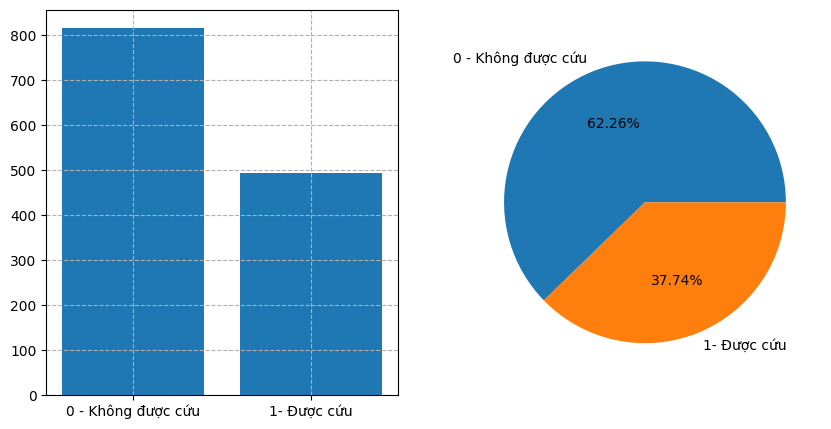

In [57]:
#Đánh giá cân bằng dữ liệu: Nhãn (y)
kq = df_titanic['Survived'].value_counts()
print(kq)
#----------------------------------------------
#Trực quan hóa kết quả:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(['0 - Không được cứu','1- Được cứu'],kq.values)
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(kq.values, labels=['0 - Không được cứu','1- Được cứu'],
       autopct='%.2f%%')
plt.show()

# --> tập dữ liệu mất cân bằng nhẹ! Đang ngiêng về lớp 0

### 4. Lưu dữ liệu sau khi đã xử lý ra file .csv
---
Lưu dữ liệu sau khi đã chuẩn hóa ra file: Data_Titanic_OK

In [58]:
#Lưu file kết quả chuẩn bị dữ liệu:
#CSV
df_data.to_csv('Data_Titanic_OK.csv',index=None)

#Excel
df_data.to_excel('Data_Titanic_OK.xlsx',index=None)